# **Introduction to Statistics in Python**

**references:**

**[1]** Online course: Data Scientist in Python (DataCamp)

**[2]** Bruce, P., Bruce, A., Gedeck P.(2020). Practical Statistics for Data Scientists (2nd ed.). O’Reilly Media, United States of America.

## **Types of statistics**

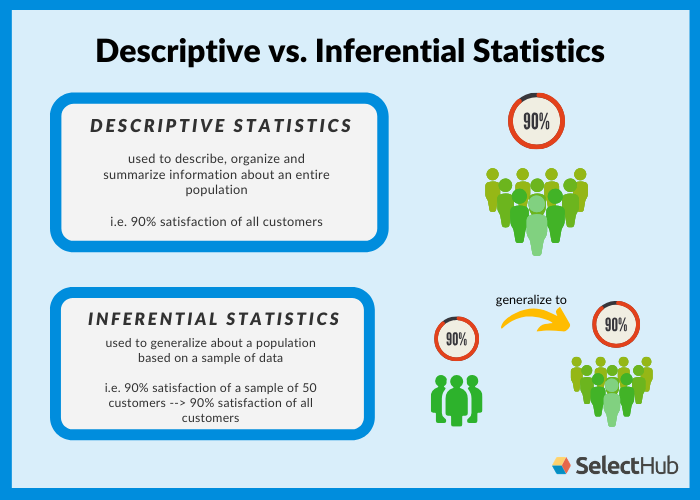

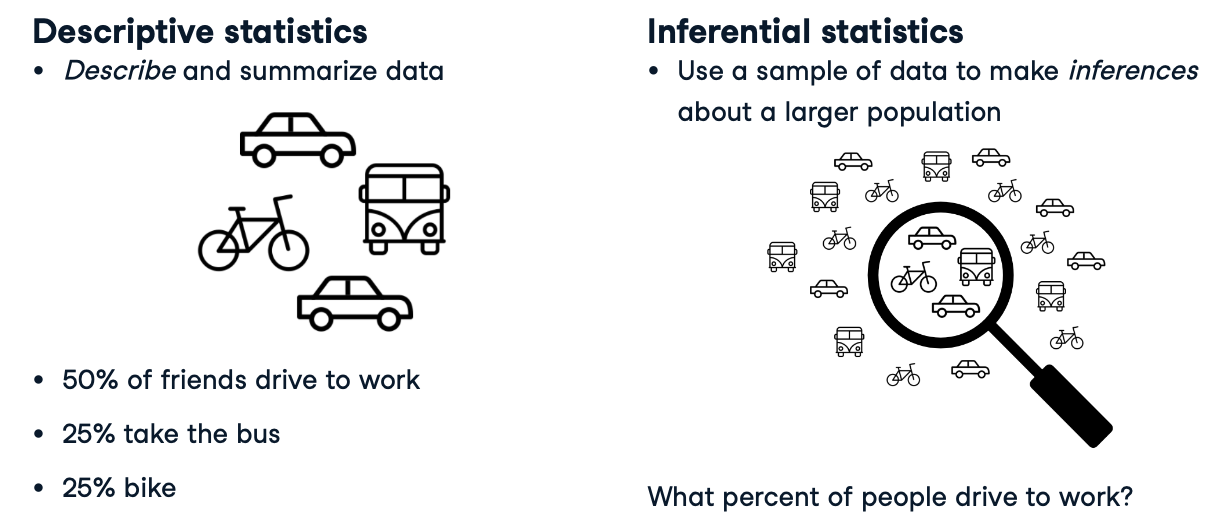

### **Descriptive statistics**
used for describing and summarizing the data at hand

**ex**
- Given data on every customer service request made, what's the average time it took to respond
- Given data on all 100,000 people who viewed an ad, what percent of people clicked on it

### **Inferential statistics**
 uses the data at hand, which is called sample data, to make inferences about a larger population

 **ex**
 - After interviewing 100 customers, what percent of all your customers are satisfied with your product ?
 - Given data on 20 fish caught in a lake, what 's the average weight of all fish in the lake ?

## **Types of data**

-  the data type is important to help determine the type of visual display, data analysis, or statistical model

- this matters to deicide which types of summary statistics and visualizations make sense for the data

-  data science software, such as R and Python, uses these data types to improve computational performance

- the data type for a variable determines how software will handle computations for that variable

- data typing in software acts as a signal to the software on how to process the data

### **Numeric (Quantitative)**
the data is made up of numeric values

- summary statistics like mean, and plots like scatter plots make sense for this type of data

- summary statistics like count, and plots like bar plots **don't** make sense for this type of data

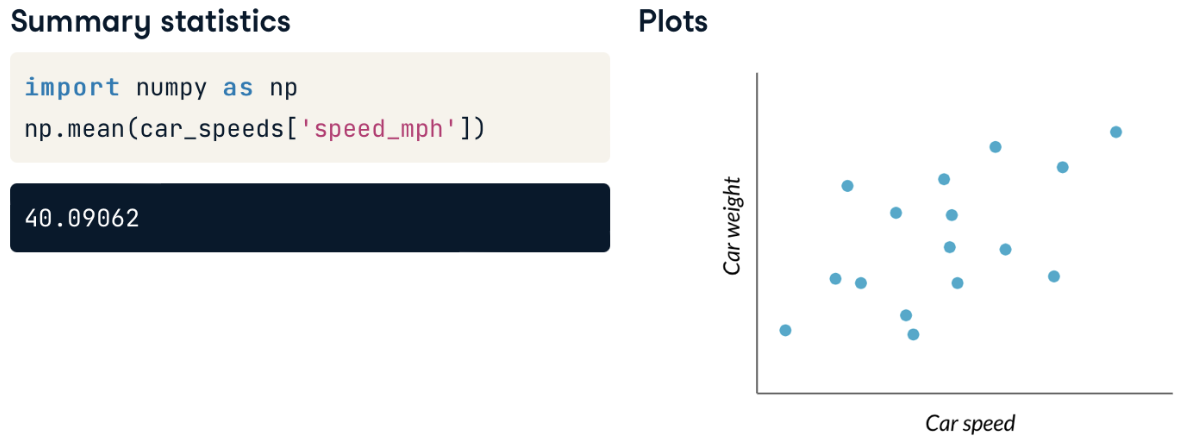

#### **Continuous (Measured)**
Data that can take on any value in an interval. (Synonyms: interval, float, numeric)


- Airplane speed
- Time spent waiting in line
- Air temperature
- Kilowatts of electricity

#### **Discrete (Counted)**

Data that can take on only integer values, such as counts. (Synonym: integer)

- Number of pets
- Number of packages shipped
- Number of clicks on an ad
- Number of DataCamp courses taken

### **Categorical (Qualitative)**
the data is made up of values that belong to distinct groups

- can sometimes represent as number
- summary statistics like count, and plots like bar plots make sense for this type of data
- scatter plot **don't** make a ton of sense for categorical data


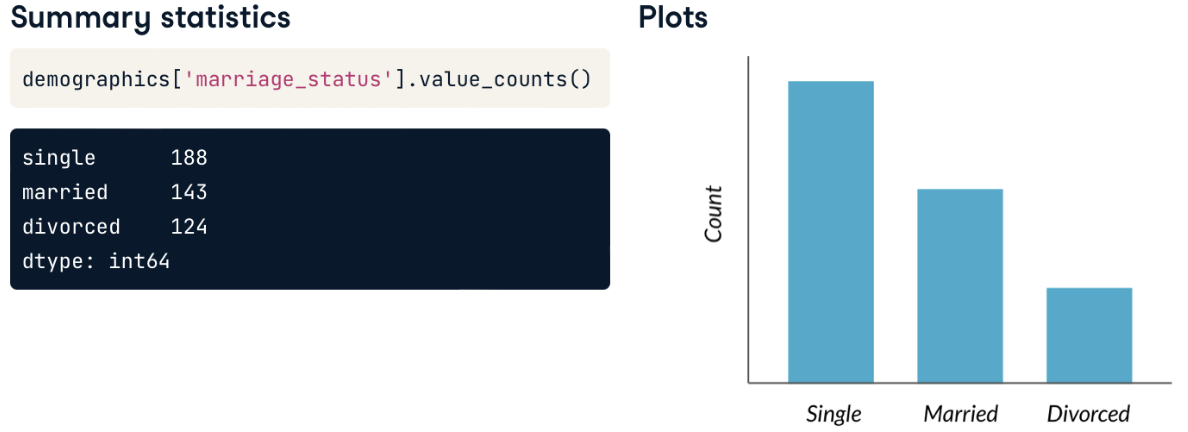

#### **Nominal (Unordered)**
Data that can take on only a specific set of values representing a set of possible categorieswith no inherent ordering (Synonyms: enums, enumerated, factors, nominal)

**ex :**
- Married/unmarried (1/0)
- Country of residence (1, 2, ...)
- Brand of product
- Zip code

#### **Ordinal (Ordered)**
categorical data has an inherent order

**ex**: degree indicating how much you agree with a statement in a survey question

- Strongly disagree (1)
- Somewhat disagree (2)
- Neither agree nor disagree (3)
- Somewhat agree (4)
- Strongly agree (5)


#### **Binary**
A special case of categorical data with just two categories of values,

**ex:**
- 0/1, true/false

(Synonyms: dichotomous, logical, indicator, boolean)


## **Measures of center**
an estimate of where most of the data is located (its central tendency)

### **Mean**
sum of all the data points divided by the total number of data points (**syn**: average)
- the mean is more sensitive to extreme values(outlier), but it works better for symmetrical data like this


### **Median**
the middle number on a sorted list of the data (**syn**: 50th percentile)

- median is usually better to use with screwed data (not symmetrical)

### **The Screwed data**
- Left Screwed: when the data is piled up on the right with a tail on the left

- Right Screwed: when the data is piled up on the left with a tail on the right

💡the mean is pulled around by extream values (in the direction of the screw). So, when the data is skewed, the median is better to use since it is less affected by outliers

### **Example of computing Mean and Median**

>compute measures of center to compare food consumption in the US and Belgium using your pandas and numpy skills




In [ ]:
#create food_consumption dataframe
import pandas as pd
url = 'https://raw.githubusercontent.com/RadchaneepornC/Python-Learning/main/Statistics%20in%20Python/dataset/food_consumption.csv'
df_food_consumption = pd.read_csv(url)
df_food_consumption.head()

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96


In [ ]:
#(I) subsetting and calling the same numpy function
import numpy as np
# Filter for Belgium
df_food_consumption_BG = df_food_consumption[df_food_consumption['country']=='Belgium']

# Filter for USA
df_food_consumption_USA = df_food_consumption[df_food_consumption['country']=='USA']

# Calculate mean and median consumption in Belgium
print(np.mean(df_food_consumption_BG["consumption"]))
print(np.median(df_food_consumption_BG["consumption"]))

# Calculate mean and median consumption in Belgium
print(np.mean(df_food_consumption_USA["consumption"]))
print(np.median(df_food_consumption_USA["consumption"]))

42.13272727272727
12.59
44.650000000000006
14.58


In [ ]:
#(I) subsetting and using pandas methods

# Filter for Belgium
df_food_consumption_BG = df_food_consumption[df_food_consumption['country']=='Belgium']

# Filter for USA
df_food_consumption_USA = df_food_consumption[df_food_consumption['country']=='USA']

# Calculate mean and median consumption in Belgium
print(df_food_consumption_BG["consumption"].mean())
print(df_food_consumption_BG["consumption"].median())

# Calculate mean and median consumption in Belgium
print(df_food_consumption_USA["consumption"].mean())
print(df_food_consumption_USA["consumption"].median())

42.13272727272727
12.59
44.650000000000006
14.58


In [ ]:
#(II) use .groupby() and .agg() [prefer method]
import numpy as np

# Subset for Belgium and USA only
be_and_usa = df_food_consumption[(df_food_consumption['country']=='Belgium')\
                                 | (df_food_consumption['country']=='USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean,np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


### **Mode**
most frequent value

## **Measures of spread**

(or Estimates of Variability)
measures whether the data values are tightly clustered or spread out


### **Deviation**
The difference between the observed values and the estimate of location, this value tell us **how dispersed the data is around the central value**

**Synonyms**: errors, residuals

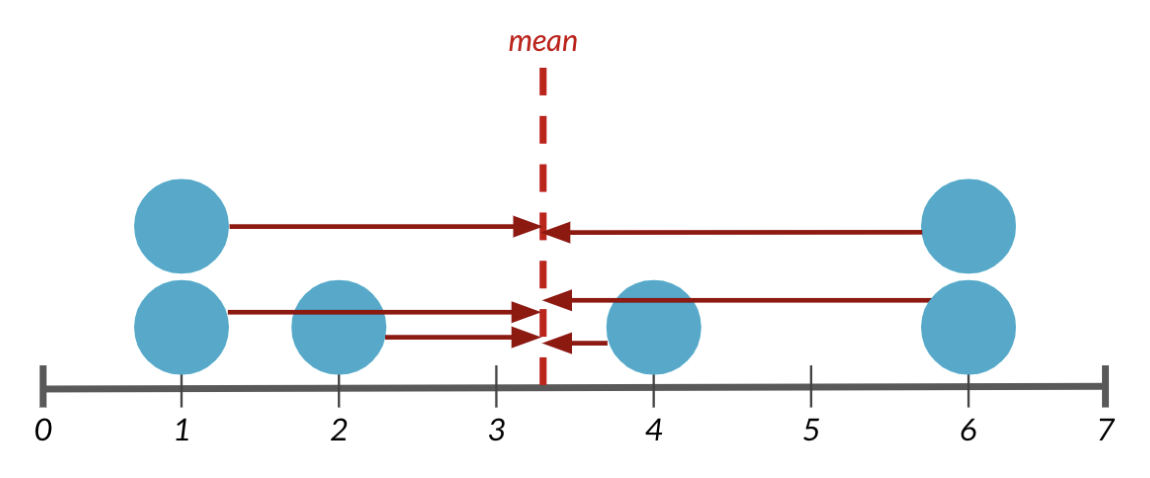

### **Mean absolute deviation**

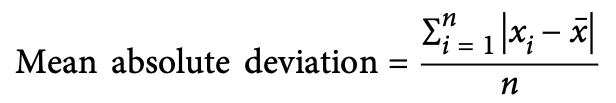

x̄ = sample mean

### **Standard deviation**

### **Variance (Mean Square Error: MSE)**
   

#### **using pandas**

    DataFrame.var(axis=None, skipna=True, ddof=1, numeric_only=False, **kwargs)

- Return unbiased variance over requested axis.

- Normalized by N-1 by default (sample variance instead of population variance, N ). This can be changed using the ddof argument.


**Parameters:**

- **axis**

*{index (0), columns (1)}*

For Series this parameter is unused and defaults to 0

- **skipna**

*bool, default True*

Exclude NA/null values. If an entire row/column is NA, the result will be NA

- **ddof**

*int, default 1*

Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements

- **numeric_only**

*bool, default False*

Include only float, int, boolean columns. Not implemented for Series

**Returns**

Series or DataFrame (if level specified)




#### **using numpy**

    numpy.var(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>, *, where=<no value>)

  ❗️default numpy ddof = 0, but pandas ddof = 1 ❗️



  > The variance is the average of the squared deviations from the mean, i.e.,

    var = mean(x)
where

    x = abs(a - a.mean())**2

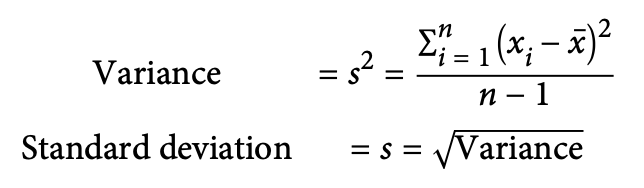

Average distance from each data point to the data's mean

- The higher the variance, the more spread out the data is

### **Quartiles**

### **Quantiles**

### **Quintiles**

## **Finding Outliers using IQR**